In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("/content/titanic.csv")
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
import seaborn as sns

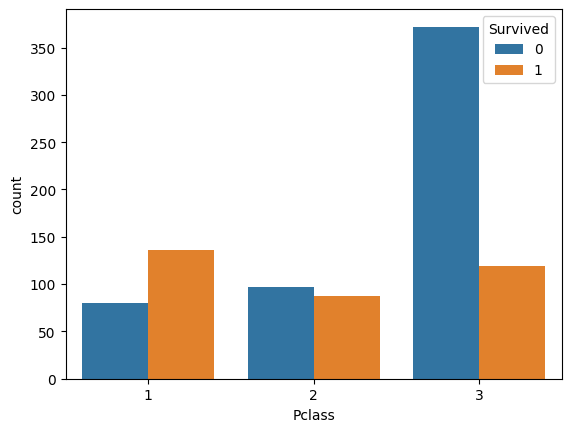

In [27]:
sns.countplot(x=data['Pclass'],hue=data['Survived']);

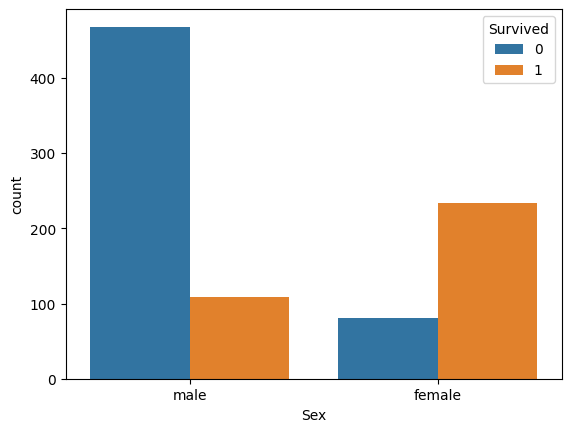

In [28]:
sns.countplot(x=data['Sex'],hue=data['Survived']);

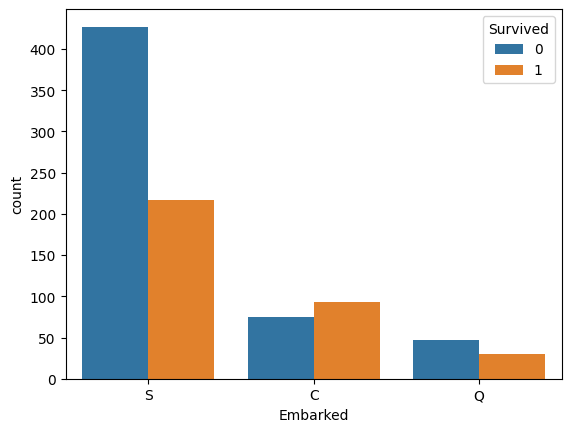

In [29]:
sns.countplot(x=data['Embarked'],hue=data['Survived']);

In [30]:
cols = ['PassengerId','Name','Ticket','Fare','Cabin']
data = data.drop(cols,axis=1)

In [31]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S

In [32]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [33]:
mean_age = round(data['Age'].mean(),2)
mean_age

29.7

In [34]:
data['Age'] = data['Age'].fillna(mean_age)

In [35]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [36]:
data = data.dropna()

In [37]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [38]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

<ipython-input-39-79b0b0d74622>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = encoder.fit_transform(data['Sex'])
<ipython-input-39-79b0b0d74622>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = encoder.fit_transform(data['Embarked'])


In [40]:
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0         0       3    1  22.0      1      0         2
1         1       1    0  38.0      1      0         0
2         1       3    0  26.0      0      0         2
3         1       1    0  35.0      1      0         2
4         0       3    1  35.0      0      0         2

In [41]:
y = data['Survived'].values
x = data.drop(['Survived'],axis=1).values

In [42]:
x

array([[ 3. ,  1. , 22. ,  1. ,  0. ,  2. ],
       [ 1. ,  0. , 38. ,  1. ,  0. ,  0. ],
       [ 3. ,  0. , 26. ,  0. ,  0. ,  2. ],
       ...,
       [ 3. ,  0. , 29.7,  1. ,  2. ,  2. ],
       [ 1. ,  1. , 26. ,  0. ,  0. ,  0. ],
       [ 3. ,  1. , 32. ,  0. ,  0. ,  1. ]])

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=9014)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [45]:
ypred = model.predict(xtest)
ypred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0])

In [46]:
ytest

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0])

In [47]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(ytest,ypred)
accu

0.7808988764044944

In [48]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [49]:
f1_score(ytest,ypred)

0.7272727272727273

In [50]:
precision_score(ytest,ypred)

0.7536231884057971

In [51]:
recall_score(ytest,ypred)

0.7027027027027027

In [52]:
confusion_matrix(ytest,ypred)

array([[87, 17],
       [22, 52]])